# 실무 조교와 함께 30분 Pandas

In [1]:
import pandas as pd
import numpy as np

# 1. Data Type

In [2]:
# Series는 모든 데이터 유형 (정수, 문자열, 부동 소수점 수, 파이썬 객체 등)을 포함한
# 1차원 레이블 배열입니다. 축 레이블을 인덱스 라고합니다 
 
pd.Series()
animals_series = pd.Series(["dog", "cat", "iguana"])
animals_series[2:]
list(animals_series)

['dog', 'cat', 'iguana']

In [3]:
# pd.Series(data,index=index)으로 DataFrame의 1D label 
# pd.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
data={'Email':{'abc@naver.com','abc@gmail.com'}, 'Name':['Seongyun','zzsza']}
index=['Name','Email','Address']
SeriesDict=pd.Series(data,index=index)
SeriesDict

Name                    [Seongyun, zzsza]
Email      {abc@naver.com, abc@gmail.com}
Address                               NaN
dtype: object

In [4]:
"""
DataFrame은 다른 유형의 열이있는 2D 차원의 레이블이 지정된 데이터 구조
스프레드 시트 나 SQL 테이블 또는 Series 객체의 dict와 같다

Dict of 1D ndarrays, lists, dicts, or Series
2-D numpy.ndarray
Structured or record ndarray
A Series
Another DataFrame
"""
data = {'one': [1., 2., 3., 4.], 'two': [4., 3., 2., 1.]}
pd.DataFrame(data)
pd.DataFrame(data, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [5]:
pd.DataFrame(data, columns=['one', 'two'])

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [6]:
# pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

# make DataFrame as columns name
df = pd.DataFrame(columns=["Name","Email","Name"])

# make DataFrame as dictionary list
name = ["Seongyun","zzsza"]
email = ["abc@naver.com","abc@gmail.com"]
df = pd.DataFrame({"Name":name,"Email":email},index=['a', 'b'])
df

,Name,Email
a,Seongyun,abc@naver.com
b,zzsza,abc@gmail.com


In [7]:
df.to_numpy()

array([['Seongyun', 'abc@naver.com'],
       ['zzsza', 'abc@gmail.com']], dtype=object)

In [8]:
# row of data frame is series
type(df.loc['a'])

pandas.core.series.Series

In [9]:
# get column from DataFrame
print(df["Name"])
print(df.Name)

a    Seongyun
b       zzsza
Name: Name, dtype: object
a    Seongyun
b       zzsza
Name: Name, dtype: object


In [10]:
# get row from Data Frame
df.loc['a']
#df.ix['a'] 
#.ix is deprecated. Please use
#.loc for label based indexing or
#.iloc for positional indexing

Name          Seongyun
Email    abc@naver.com
Name: a, dtype: object

# 2. Insert

In [11]:
# insert dictionary data
df.loc[2] = {"Name":"seongjin byeon", "Email":"bsj@gmail.com"}
df

,Name,Email
a,Seongyun,abc@naver.com
b,zzsza,abc@gmail.com
2,seongjin byeon,bsj@gmail.com


In [12]:
# add Column
df["Address"] = ""

# remove Column
# inplace=True : adapt DataFrame directly
# axis=1 : append width (default : axis=0)
df.drop('Address', axis=1, inplace=True) 

# insert new Column Data (using functional programing)

# first method
def get_address(name):
    return "Mapo Cobion (" + name + ")"
df["Address"] = df["Name"].apply(get_address)

# second method (using lambda)
df["Address"] = df["Name"].apply(lambda name: "Incheonsi (" + name + ")")

In [13]:
df

,Name,Email,Address
a,Seongyun,abc@naver.com,Incheonsi (Seongyun)
b,zzsza,abc@gmail.com,Incheonsi (zzsza)
2,seongjin byeon,bsj@gmail.com,Incheonsi (seongjin byeon)


In [14]:
# add just one data
# df.loc[idx,colum] = value
df.loc[2, "Name"] = "bsj"

df

,Name,Email,Address
a,Seongyun,abc@naver.com,Incheonsi (Seongyun)
b,zzsza,abc@gmail.com,Incheonsi (zzsza)
2,bsj,bsj@gmail.com,Incheonsi (seongjin byeon)


# 3. Append (추가)
데이터프레임에 행을 추가합니다. 
부모.prepend(자식) 또는 자식.prependTo(부모)

In [15]:
# make sample data
a_df = pd.DataFrame([
        {
            "Name" : "A 회사 직원 (1)",
            "Age" : 30,
        },
        {
            "Name" : "A 회사 직원 (2)",
            "Age" : 28,
        }
    ])

b_df = pd.DataFrame([
        {
            "Name" : "B 회사 직원 (1)",
            "Age" : 32,
        },
        {
            "Name" : "B 회사 직원 (2)",
            "Age" : 26,
        }
    ])

print(a_df)
print(b_df)

   Age         Name
0   30  A 회사 직원 (1)
1   28  A 회사 직원 (2)
   Age         Name
0   32  B 회사 직원 (1)
1   26  B 회사 직원 (2)


In [16]:
# 부모.prepend(자식) 
#df.append(other, ignore_index=False, verify_integrity=False, sort=None)
ab_df = a_df.append(b_df)
ab_df

,Age,Name
0,30,A 회사 직원 (1)
1,28,A 회사 직원 (2)
0,32,B 회사 직원 (1)
1,26,B 회사 직원 (2)


In [17]:
# reindex
ab_df.reset_index(drop=True, inplace=True)

#ab_df = a_df.append(b_df,ignore_index=True)
ab_df

,Age,Name
0,30,A 회사 직원 (1)
1,28,A 회사 직원 (2)
2,32,B 회사 직원 (1)
3,26,B 회사 직원 (2)


# 4. Concat (연결)

Concat (연결)은 결합 (join) / 병합 (merge) 형태의 연산에 대한 인덱스, 관계 대수 기능을 위한 다양한 형태의 논리를 포함한 Series, 데이터프레임, Panel 객체를 손쉽게 결합할 수 있도록 하는 다양한 기능을 pandas 에서 제공합니다.


In [18]:
a_df["Company"] = "Kakao"
b_df["Company"] = "Daum"

print(a_df)
print(b_df)

   Age         Name Company
0   30  A 회사 직원 (1)   Kakao
1   28  A 회사 직원 (2)   Kakao
   Age         Name Company
0   32  B 회사 직원 (1)    Daum
1   26  B 회사 직원 (2)    Daum


In [19]:
# concat (k_df & d_df)concat()으로 pandas 객체를 연결합니다.
kd_df = pd.concat([a_df, b_df]).reset_index(drop=True)
kd_df

,Age,Name,Company
0,30,A 회사 직원 (1),Kakao
1,28,A 회사 직원 (2),Kakao
2,32,B 회사 직원 (1),Daum
3,26,B 회사 직원 (2),Daum


In [20]:
# concat with keys
ab_df = pd.concat([a_df, b_df], keys=["Kakao", "Daum"])
ab_df

Age         Name Company
Kakao 0   30  A 회사 직원 (1)   Kakao
      1   28  A 회사 직원 (2)   Kakao
Daum  0   32  B 회사 직원 (1)    Daum
      1   26  B 회사 직원 (2)    Daum

In [21]:
# concat columns, axis=1 width concat, axis=0 height concat
pd.concat([a_df, b_df], axis=1)

,Age,Name,Company,Age,Name,Company
0,30,A 회사 직원 (1),Kakao,32,B 회사 직원 (1),Daum
1,28,A 회사 직원 (2),Kakao,26,B 회사 직원 (2),Daum


In [22]:
# select Kakao second employer's name
ab_df.loc["Kakao"].loc[1]["Name"]

'A 회사 직원 (2)'

# 5. Combining with stats and GroupBy

범주의 열을 기준으로 그룹화하면 빈 범주도 표시됩니다.

In [23]:
# make sample data
df = pd.DataFrame(columns=["si","dong"])
df.loc[len(df)] = ["seoul","sinsa"]
df.loc[len(df)] = ["seoul","mangwon"]
df.loc[len(df)] = ["busan","1dong"]
df.loc[len(df)] = ["busan","2dong"]
df.loc[len(df)] = ["kyungki","suwon"]
df.loc[len(df)] = ["kyungki","jungja"]
df

,si,dong
0,seoul,sinsa
1,seoul,mangwon
2,busan,1dong
3,busan,2dong
4,kyungki,suwon
5,kyungki,jungja


In [24]:
# unique (using python list, using numpy ndarray)
# list_df = list(set(list(groupby_df["si"]))) # Python list
# print(list_df)

list_df = df["si"].unique() # numpy ndarray (bertter : fast)
print(list_df)

['seoul' 'busan' 'kyungki']


In [25]:
#groupby 'by: 그룳을 결정, axis : {0 or 'index', 1 or 'columns'}
#df.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, observed=False, **kwargs)
print(df.groupby("si").groups)
df.groupby("si").get_group("seoul")

{'busan': Int64Index([2, 3], dtype='int64'), 'kyungki': Int64Index([4, 5], dtype='int64'), 'seoul': Int64Index([0, 1], dtype='int64')}


,si,dong
0,seoul,sinsa
1,seoul,mangwon


# 6. Merge(병합)


In [26]:
# make sample data (users)
users_df = pd.DataFrame(columns=["Id","Name","Age","Signup Date"])
users_df.loc[len(users_df)] = [str(len(users_df)+1), "seongyun", "27", "2016-01-01"]
users_df.loc[len(users_df)] = [str(len(users_df)+1), "seongjin", "21", "2016-04-21"]
users_df.loc[len(users_df)] = [str(len(users_df)+1), "suchan", "24", "2016-03-12"]
users_df

,Id,Name,Age,Signup Date
0,1,seongyun,27,2016-01-01
1,2,seongjin,21,2016-04-21
2,3,suchan,24,2016-03-12


In [27]:
# make sample data (purchase)
purchase_df = pd.DataFrame(columns=["UserId", "Amount", "Purchase Date"])
purchase_df.loc[len(purchase_df)] = ["1", "4000", "2016-01-02"]
purchase_df.loc[len(purchase_df)] = ["3", "14000", "2016-05-03"]
purchase_df.loc[len(purchase_df)] = ["2", "8000", "2016-04-29"]
purchase_df.loc[len(purchase_df)] = ["2", "42000", "2016-04-04"]
purchase_df.loc[len(purchase_df)] = ["2", "23000", "2016-03-05"]
purchase_df.loc[len(purchase_df)] = ["1", "2000", "2016-02-02"]
purchase_df.loc[len(purchase_df)] = ["3", "9000", "2016-05-25"]
purchase_df

,UserId,Amount,Purchase Date
0,1,4000,2016-01-02
1,3,14000,2016-05-03
2,2,8000,2016-04-29
3,2,42000,2016-04-04
4,2,23000,2016-03-05
5,1,2000,2016-02-02
6,3,9000,2016-05-25


In [28]:
# merge (different key : UserId, Id)
purchase_df.merge(users_df, left_on="UserId", right_on="Id")[["Id", "Amount", "Purchase Date", "Name", "Age", "Signup Date"]]

,Id,Amount,Purchase Date,Name,Age,Signup Date
0,1,4000,2016-01-02,seongyun,27,2016-01-01
1,1,2000,2016-02-02,seongyun,27,2016-01-01
2,3,14000,2016-05-03,suchan,24,2016-03-12
3,3,9000,2016-05-25,suchan,24,2016-03-12
4,2,8000,2016-04-29,seongjin,21,2016-04-21
5,2,42000,2016-04-04,seongjin,21,2016-04-21
6,2,23000,2016-03-05,seongjin,21,2016-04-21


In [29]:
# rename column
rename_users_df = users_df.rename(columns={"Id":"UserId"}) 

# merge (different same key : UserId)
pd.merge(purchase_df, rename_users_df)[["UserId", "Amount", "Purchase Date", "Name", "Age", "Signup Date"]]

,UserId,Amount,Purchase Date,Name,Age,Signup Date
0,1,4000,2016-01-02,seongyun,27,2016-01-01
1,1,2000,2016-02-02,seongyun,27,2016-01-01
2,3,14000,2016-05-03,suchan,24,2016-03-12
3,3,9000,2016-05-25,suchan,24,2016-03-12
4,2,8000,2016-04-29,seongjin,21,2016-04-21
5,2,42000,2016-04-04,seongjin,21,2016-04-21
6,2,23000,2016-03-05,seongjin,21,2016-04-21


# 7. File Input Output

In [30]:
# make sample data
df = pd.DataFrame([{"Name":"seongyun", "Age":27}, {"Name":"seongjin", "Age":21}, {"Name":"suchan", "Age":24}])
df

,Age,Name
0,27,seongyun
1,21,seongjin
2,24,suchan


In [31]:
# input DataFrame to csv and Save
df.to_csv("./sample.csv", index=False)

In [32]:
# Output csv to DataFrame
df = pd.read_csv("./sample.csv",encoding='utf-8')
df

,Age,Name
0,27,seongyun
1,21,seongjin
2,24,suchan


In [33]:
# rename columns
df.rename(columns={"Age":"나이","Name":"이름"}, inplace=True)
df.head()

,나이,이름
0,27,seongyun
1,21,seongjin
2,24,suchan


In [34]:
# string contains
is_contain = df["이름"].str.contains("un")
df[is_contain]

,나이,이름
0,27,seongyun


In [35]:
# sorting
# ascending (True : 오름차순(default), False : 내림차순)
df.sort_values("나이", ascending=True).reset_index(drop=True, inplace=True)
df

,나이,이름
0,27,seongyun
1,21,seongjin
2,24,suchan


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
나이    3 non-null int64
이름    3 non-null object
dtypes: int64(1), object(1)
memory usage: 128.0+ bytes


# 8. Change value type and Categoricals

In [37]:
#Name 열을 범주 유형 및 Age 열을 int64 유형으로 변경
df = df.astype({"이름":'category', "나이":'int64'}) 
df

,나이,이름
0,27,seongyun
1,21,seongjin
2,24,suchan


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
나이    3 non-null int64
이름    3 non-null category
dtypes: category(1), int64(1)
memory usage: 211.0 bytes


In [39]:
df_cat = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df_cat

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [40]:
df_cat["grade"] = df_cat["raw_grade"].astype("category")
df_cat["grade"] #raw_grade를 범주 형 데이터 형식으로 변환

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [41]:
#카테고리 이름 변경
df_cat["grade"].cat.categories = ["very good", "good", "very bad"]
df_cat["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [42]:
#카테고리의 순서를 바꾸고 동시에 누락 된 카테고리를 추가 5개로 만듬
df_cat["grade"]=df_cat["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df_cat["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [43]:

df_cat.sort_values(by="grade")


,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [44]:
df_cat.groupby("grade").size()
#빈 카테고리도 표시

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 9. Get element of Series on index

In [45]:
# example
df2 = pd.DataFrame([[1, 2], [3, 4]], ['a', 'b'], ['A', 'B'])
df2

,A,B
a,1,2
b,3,4


In [46]:
df2.iloc[0]

A    1
B    2
Name: a, dtype: int64

In [47]:
df2['A'].iloc[0]

1

# 10. Reshaping (변형)
계층적 인덱싱 및 변형 부분을 참조하세요.

## Stack (스택)
stack() 메소드는 데이터프레임 열들의 계층을 “압축”합니다.
“Stack된” 데이터프레임 또는 (MultiIndex를 인덱스로 사용하는) Series인 경우, stack()의 역 연산은 unstack()이며, 기본적으로 마지막 계층을 unstack합니다.

In [48]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [49]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [50]:
import numpy as np
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [51]:
df2  =  df[:4]
df2

A         B
first second                    
bar   one    -2.305443  0.794868
      two     1.030429  0.419217
baz   one     0.097246  1.142939
      two     0.124065  1.149806

In [52]:
stacked = df2.stack()

In [53]:
stacked

first  second   
bar    one     A   -2.305443
               B    0.794868
       two     A    1.030429
               B    0.419217
baz    one     A    0.097246
               B    1.142939
       two     A    0.124065
               B    1.149806
dtype: float64

## Pivot Tables (피봇 테이블)
pivot()다양한 데이터 유형 (문자열, 숫자 등)으로 범용 피벗을 제공 
pivot_table() 숫자 데이터를 집계하여 피벗을 제공

In [54]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.101138,-0.223167
1,one,B,foo,1.123437,-1.464012
2,two,C,foo,0.605603,-1.480307
3,three,A,bar,0.444764,0.426459
4,one,B,bar,-0.756382,0.597245
5,one,C,bar,0.239790,0.201895
6,two,A,foo,-0.901810,1.452501
7,three,B,foo,-2.222971,-0.758637
8,one,C,foo,-0.536477,-0.759367
9,one,A,bar,-0.258640,-1.105552


In [55]:
#data: DataFrame 객체 / values: 집계 할 열 또는 열 목록 
#index: 피벗 테이블 인덱스에 따라 그룹화 할 키
#columns: 피벗 테이블 열에서 그룹화 할 키
#aggfunc: 집계에 사용하는 함수이며, 기본값 numpy.mean.
    
pd.pivot_table(df, values=['D','E'], index=['A', 'B'], columns=['C'])

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A -0.258640  0.101138 -1.105552 -0.223167
      B -0.756382  1.123437  0.597245 -1.464012
      C  0.239790 -0.536477  0.201895 -0.759367
three A  0.444764       NaN  0.426459       NaN
      B       NaN -2.222971       NaN -0.758637
      C  0.450130       NaN  0.113262       NaN
two   A       NaN -0.901810       NaN  1.452501
      B -0.504637       NaN -0.458945       NaN
      C       NaN  0.605603       NaN -1.480307

# 11. Plotting (그래프)

In [56]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [57]:
ts = ts.cumsum()

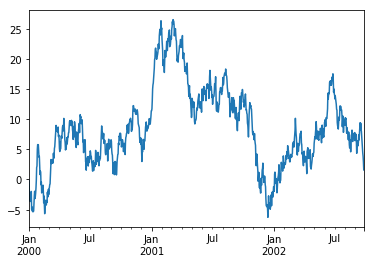

In [59]:
ts.plot()